In [26]:
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Input
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [27]:
# Load the trained emotion detection model
model = load_model("/kaggle/input/task1model/emotion_detector_model.h5")

# Print layer names and output shapes
print("Layer names and output shapes:")
for i, layer in enumerate(model.layers):
    print(i, layer.name, layer.output.shape)


Layer names and output shapes:
0 conv2d (None, 46, 46, 64)
1 batch_normalization (None, 46, 46, 64)
2 max_pooling2d (None, 23, 23, 64)
3 dropout (None, 23, 23, 64)
4 conv2d_1 (None, 21, 21, 128)
5 batch_normalization_1 (None, 21, 21, 128)
6 max_pooling2d_1 (None, 10, 10, 128)
7 dropout_1 (None, 10, 10, 128)
8 conv2d_2 (None, 8, 8, 256)
9 batch_normalization_2 (None, 8, 8, 256)
10 max_pooling2d_2 (None, 4, 4, 256)
11 dropout_2 (None, 4, 4, 256)
12 flatten (None, 4096)
13 dense (None, 128)
14 dropout_3 (None, 128)
15 dense_1 (None, 7)


In [28]:
def preprocess_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (48, 48))  # Match model input size
    img = img.astype('float32') / 255.0
    img = np.expand_dims(img, axis=[0, -1])  # Final shape: (1, 48, 48, 1)
    return img


In [29]:
# Define new input layer to extract intermediate outputs
input_layer = Input(shape=(48, 48, 1))
x = input_layer
outputs = []
layer_names = ['conv2d', 'conv2d_1', 'conv2d_2']  # Layers to visualize

for layer in model.layers:
    x = layer(x)
    if layer.name in layer_names:
        outputs.append(x)

# Build the new model
activation_model = Model(inputs=input_layer, outputs=outputs)


In [30]:
# Change this path to your image file
img_path = "/kaggle/input/task1model-image/18.jpeg"  
img = preprocess_image(img_path)

# Get intermediate activations
activations = activation_model.predict(img)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


In [31]:
def plot_feature_maps(activation, layer_name):
    num_filters = activation.shape[-1]
    size = activation.shape[1]
    cols = 8
    rows = num_filters // cols + 1
    
    fig, axes = plt.subplots(rows, cols, figsize=(12, 8))
    fig.suptitle(f'Activation Maps for Layer: {layer_name}', fontsize=16)

    for i in range(rows * cols):
        if i < num_filters:
            ax = axes[i // cols, i % cols]
            ax.imshow(activation[0, :, :, i], cmap='viridis')
            ax.axis('off')
        else:
            axes[i // cols, i % cols].axis('off')
    plt.tight_layout()
    plt.show()


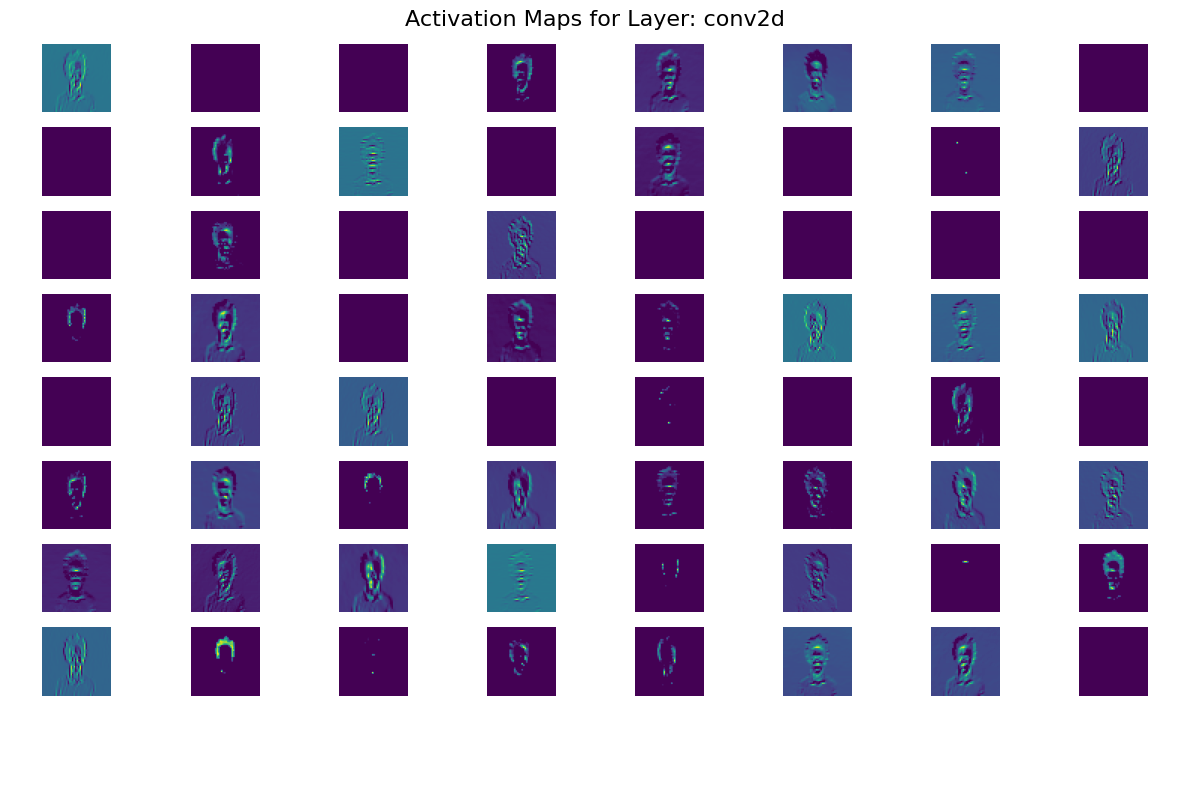

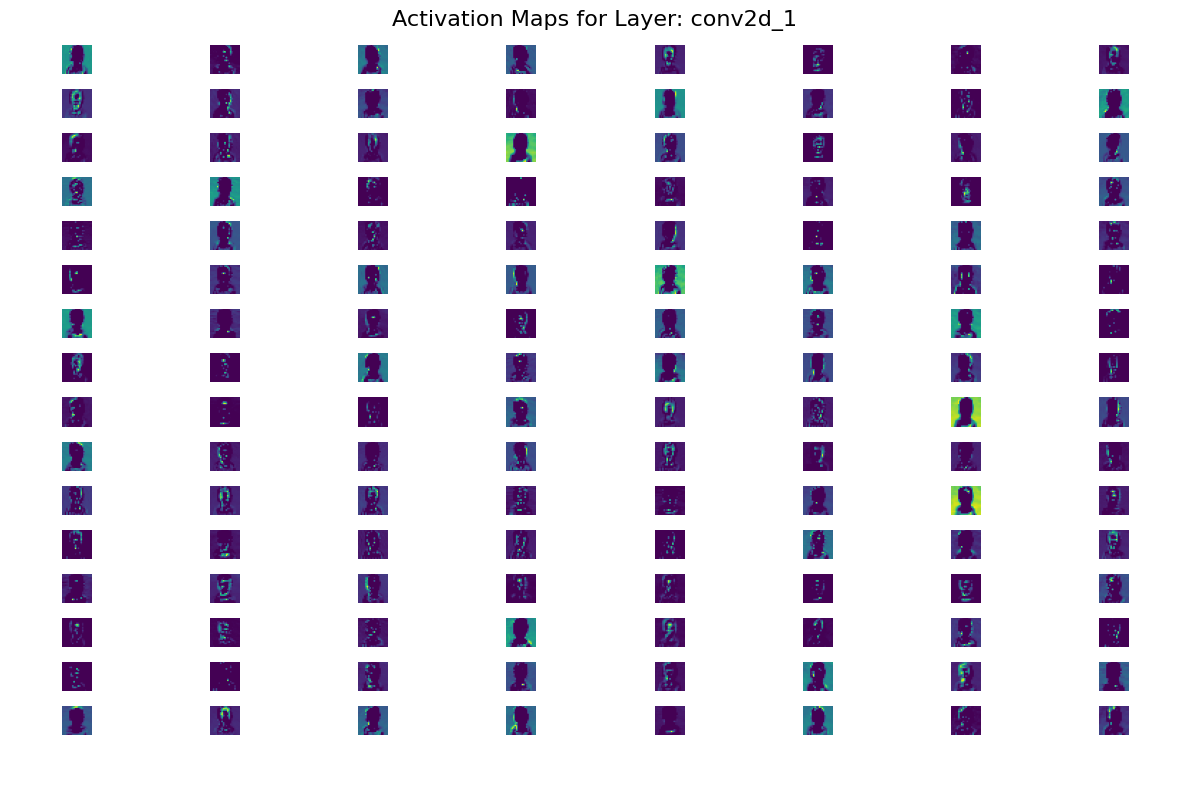

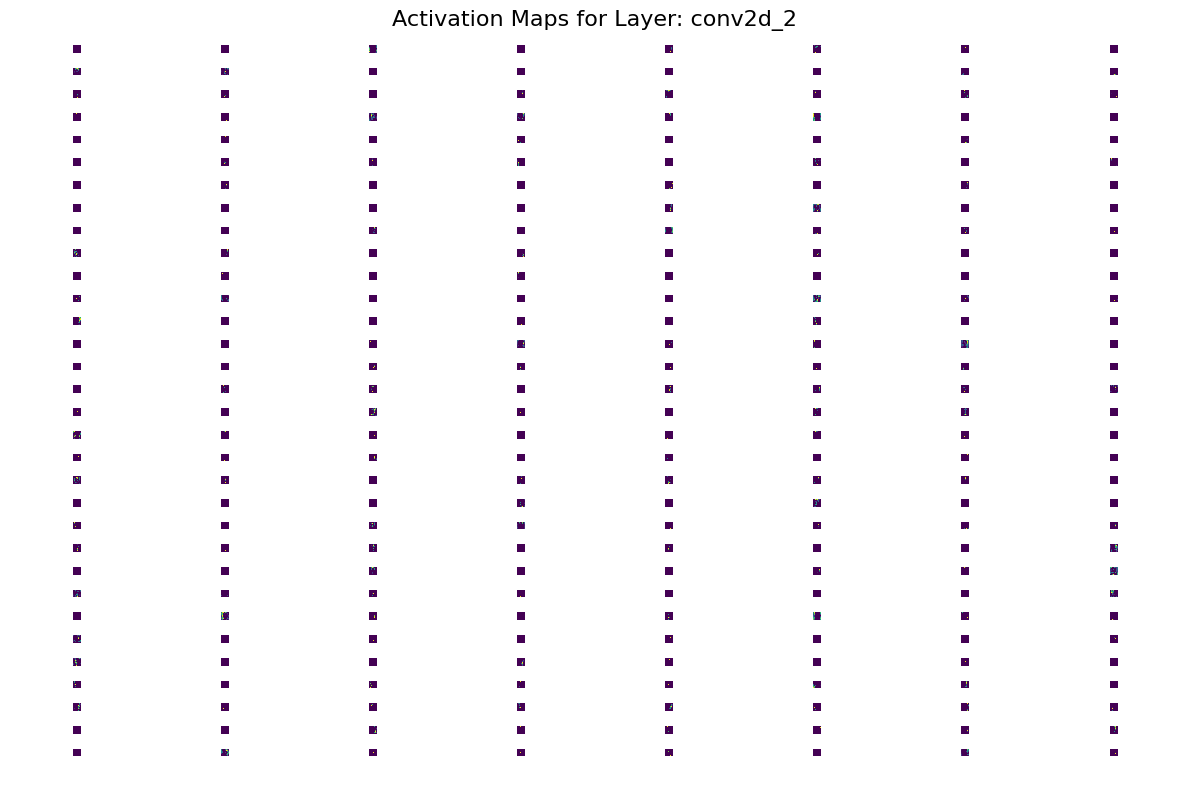

In [32]:
# Plot activations for each selected layer
for act, name in zip(activations, layer_names):
    plot_feature_maps(act, name)
